In [5]:
import pandas as pd   
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
import re

In [6]:
df_trash = pd.read_csv('../data/trash_hauler_report_with_lat_lng.csv')
df_trash

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,LONGITUDE,LATITUDE
0,25270,11/1/2017,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207.0,RED RIVER,3205,2.0,1727970.412,686779.4781,-86.815392,36.217292
1,25274,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1721259.366,685444.7996,-86.838103,36.213470
2,25276,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1707026.753,659887.4716,-86.885562,36.142923
3,25307,11/1/2017,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1735691.771,685027.2459,-86.789170,36.212652
4,25312,11/1/2017,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1710185.772,664205.1011,-86.874995,36.154861
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20221,267125,11/1/2019,Trash - Curbside/Alley Missed Pickup,MISSED...NEIGHBORS MISSED,2731 Murfreesboro Pike,37013.0,RED RIVER,4502,32.0,1781137.263,632448.5511,-86.633970,36.069130
20222,267126,11/1/2019,Trash - Curbside/Alley Missed Pickup,entire alley,"1621 Long Ave, Nashville, TN 37206, United States",37206.0,METRO,9508,6.0,1749711.399,669201.6016,-86.741242,36.169482
20223,267130,11/1/2019,Trash - Curbside/Alley Missed Pickup,missed several,"2943 Windemere Cir, Nashville, TN 37214, Unite...",37214.0,RED RIVER,1502,15.0,1770293.388,674936.3038,-86.671647,36.185643
20224,267134,11/1/2019,Trash - Curbside/Alley Missed Pickup,Caller stated trash was missed & were only pic...,"3325 Murfreesboro Pike, Nashville, TN 37013, U...",37013.0,RED RIVER,4502,32.0,1785224.998,627146.4002,-86.620025,36.054637


In [7]:
df_trash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20226 entries, 0 to 20225
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Request Number    20226 non-null  int64  
 1   Date Opened       20226 non-null  object 
 2   Request           20226 non-null  object 
 3   Description       20195 non-null  object 
 4   Incident Address  20217 non-null  object 
 5   Zip Code          20151 non-null  float64
 6   Trash Hauler      19325 non-null  object 
 7   Trash Route       19279 non-null  object 
 8   Council District  20177 non-null  float64
 9   State Plan X      20198 non-null  float64
 10  State Plan Y      20198 non-null  float64
 11  LONGITUDE         20198 non-null  float64
 12  LATITUDE          20198 non-null  float64
dtypes: float64(6), int64(1), object(6)
memory usage: 2.0+ MB


In [8]:
df_trash.columns

Index(['Request Number', 'Date Opened', 'Request', 'Description',
       'Incident Address', 'Zip Code', 'Trash Hauler', 'Trash Route',
       'Council District', 'State Plan X', 'State Plan Y', 'LONGITUDE',
       'LATITUDE'],
      dtype='object')

In [9]:
missed_pickups = df_trash[df_trash['Request'].isin(['Trash - Curbside/Alley Missed Pickup', 'Trash - Backdoor',
                                                    'Trash Collection Complaint'])]

In [10]:
missed_pickups

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,LONGITUDE,LATITUDE
0,25270,11/1/2017,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207.0,RED RIVER,3205,2.0,1727970.412,686779.4781,-86.815392,36.217292
1,25274,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1721259.366,685444.7996,-86.838103,36.213470
2,25276,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1707026.753,659887.4716,-86.885562,36.142923
3,25307,11/1/2017,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1735691.771,685027.2459,-86.789170,36.212652
4,25312,11/1/2017,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1710185.772,664205.1011,-86.874995,36.154861
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20221,267125,11/1/2019,Trash - Curbside/Alley Missed Pickup,MISSED...NEIGHBORS MISSED,2731 Murfreesboro Pike,37013.0,RED RIVER,4502,32.0,1781137.263,632448.5511,-86.633970,36.069130
20222,267126,11/1/2019,Trash - Curbside/Alley Missed Pickup,entire alley,"1621 Long Ave, Nashville, TN 37206, United States",37206.0,METRO,9508,6.0,1749711.399,669201.6016,-86.741242,36.169482
20223,267130,11/1/2019,Trash - Curbside/Alley Missed Pickup,missed several,"2943 Windemere Cir, Nashville, TN 37214, Unite...",37214.0,RED RIVER,1502,15.0,1770293.388,674936.3038,-86.671647,36.185643
20224,267134,11/1/2019,Trash - Curbside/Alley Missed Pickup,Caller stated trash was missed & were only pic...,"3325 Murfreesboro Pike, Nashville, TN 37013, U...",37013.0,RED RIVER,4502,32.0,1785224.998,627146.4002,-86.620025,36.054637


In [11]:
fine_amount = 200
misses_allowed = 1

In [12]:
address_counts = missed_pickups['Incident Address'].value_counts()
address_counts

Incident Address
5135 Hickory Hollow Pkwy                                      21
3710 N NATCHEZ CT                                             20
12546 Old Hickory Blvd, Nashville, TN 37013, United States    19
6007 Obrien Ave, Nashville, TN 37209, United States           19
802 Crescent Rd, Nashville, TN 37205, United States           18
                                                              ..
310 Mckennell Dr, Nashville, TN 37206, United States           1
1238 Riverwood Dr, Nashville, TN 37216, United States          1
814 W OLD HICKORY BLVD                                         1
2831 BARCLAY DR                                                1
604 Somerset Ct, Nashville, TN 37217, United States            1
Name: count, Length: 13936, dtype: int64

In [13]:
#missed pickups for just red river
red_river = missed_pickups[missed_pickups['Trash Hauler'] == 'RED RIVER']
red_river_counts = red_river['Incident Address'].value_counts()
red_river_counts

Incident Address
3710 N NATCHEZ CT                                             19
12546 Old Hickory Blvd, Nashville, TN 37013, United States    19
6007 Obrien Ave, Nashville, TN 37209, United States           18
5135 Hickory Hollow Pkwy                                      18
802 Crescent Rd, Nashville, TN 37205, United States           17
                                                              ..
909 Marilyn Rd, Nashville, TN 37209, United States             1
305 Harrison St, Nashville, TN 37211, United States            1
505 JOCELYN HOLLOW CT, 37205                                   1
744 Post Oak Dr, Nashville, TN 37013, United States            1
604 Somerset Ct, Nashville, TN 37217, United States            1
Name: count, Length: 9975, dtype: int64

In [14]:
# total_fines
all_fines = ((address_counts[address_counts > 1] - misses_allowed) * fine_amount).sum() 
all_fines

1204800

In [15]:
red_river_fines = ((red_river_counts[red_river_counts > 1] - misses_allowed) * fine_amount).sum()
red_river_fines

844400

In [16]:
results = pd.DataFrame({'Category': ['All Haulers', 'Red River only'], 'Total Fines': [all_fines, red_river_fines]})
results

,Category,Total Fines
0,All Haulers,1204800
1,Red River only,844400


In [17]:
results.sum()

Category       All HaulersRed River only
Total Fines                      2049200
dtype: object

In [19]:
# * What other types of complaints are there?
complaint_type = df_trash['Request'].value_counts()
complaint_type

Request
Trash - Curbside/Alley Missed Pickup    15028
Trash - Backdoor                         2629
Trash Collection Complaint               2312
Damage to Property                        257
Name: count, dtype: int64

In [26]:
complaint_df = complaint_type.reset_index()
complaint_df.columns = ['Request', 'Count']
complaint_df

,Request,Count
0,Trash - Curbside/Alley Missed Pickup,15028
1,Trash - Backdoor,2629
2,Trash Collection Complaint,2312
3,Damage to Property,257


In [34]:
complaint_df.sum()

Request    Trash - Curbside/Alley Missed PickupTrash - Ba...
Count                                                  20226
dtype: object

In [37]:
complaint_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Request  4 non-null      object
 1   Count    4 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 196.0+ bytes


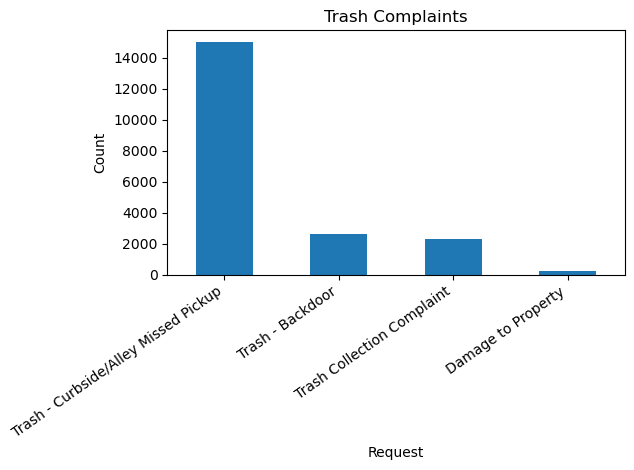

In [39]:
complaint_df.plot(kind='bar', x='Request', y='Count', legend=False)
plt.title('Trash Complaints')
plt.ylabel('Count')
plt.xticks(rotation=35, ha='right')
plt.tight_layout()

In [41]:
# * Are there any geospatial analysis you can do?  Which visualizations can you create?

In [80]:
# * How do metro crews compare to the contractor's performance?
missed_pickups = df_trash[df_trash['Request'] == "Trash - Curbside/Alley Missed Pickup"]
missed_by_hauler = missed_pickups['Trash Hauler'].value_counts(dropna=False)
missed_by_hauler

Trash Hauler
RED RIVER    10715
METRO         2646
WASTE IND     1019
NaN            606
Metro           42
Name: count, dtype: int64

In [82]:
missed_by_hauler.sum()

15028

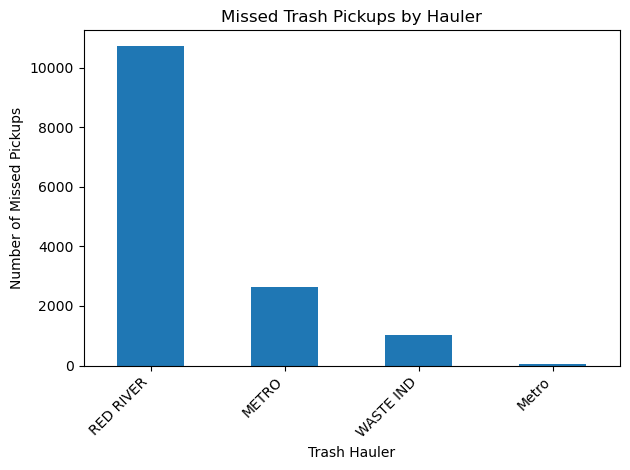

In [95]:
plt.figure()
missed_by_hauler.plot(kind='bar')
plt.ylabel('Number of Missed Pickups')
plt.xlabel('Trash Hauler')
plt.title('Missed Trash Pickups by Hauler')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [59]:
# * How much does each trash hauler owe?

In [61]:
# * What were to total missed pickup by route?
missed_by_route = df_trash.groupby('Trash Route').size().reset_index(name='Missed Pickups').sort_values(by='Missed Pickups', ascending=False)
missed_by_route

,Trash Route,Missed Pickups
134,4504,359
75,3302,310
9,1303,286
6,1301,275
125,4404,274
...,...,...
53,2405S,3
22,1502S,2
78,3303S,2
60,2505S,2


In [63]:
##Bonus_Quation
# For each address, if there are three or more missed pickups within a 180-day period, damages of $1500 will be charged
fine_amount = 1500
misses_allowed = 3

In [65]:
df_method1 = df_trash[df_trash['Request'].isin(['Trash - Curbside/Alley Missed Pickup'])]
df_method1.loc[: , "Date Opened"] = pd.to_datetime(df_method1["Date Opened"])
df_method1 = df_method1[["Incident Address", "Date Opened"]]
df_method1

,Incident Address,Date Opened
1,4028 Clarksville Pike,2017-11-01 00:00:00
2,6528 Thunderbird Dr,2017-11-01 00:00:00
3,2603 old matthews rd,2017-11-01 00:00:00
4,604 croley dr,2017-11-01 00:00:00
8,4484 Lavergne Couchville Pike,2017-11-01 00:00:00
...,...,...
20221,2731 Murfreesboro Pike,2019-11-01 00:00:00
20222,"1621 Long Ave, Nashville, TN 37206, United States",2019-11-01 00:00:00
20223,"2943 Windemere Cir, Nashville, TN 37214, Unite...",2019-11-01 00:00:00
20224,"3325 Murfreesboro Pike, Nashville, TN 37013, U...",2019-11-01 00:00:00


In [67]:
method1_result = df_method1.groupby("Incident Address").rolling("180D", on="Date Opened")["Date Opened"].count()
method1_result[method1_result > misses_allowed].count() * fine_amount

C:\Users\aveen\anaconda3\Lib\site-packages\pandas\core\window\rolling.py:162: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  self._on = Index(self.obj[self.on])
C:\Users\aveen\anaconda3\Lib\site-packages\pandas\core\window\rolling.py:162: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  self._on = Index(self.obj[self.on])


748500

In [194]:
# ## Missed Trash Pickups

# The city is considering different ways to calculate fines. Here are two methods that are being considered.
#Calculate the total fines that would be collected by each and compare that total to the amount collected using the current method.


# ### Alternative Method 1:
# For each address, if there are three or more missed pickups within a 180-day period, damages of $1500 will be charged.
#(A fine will be levied every time three unique missed pickup dates occur within a six-month period for a single address.)


# ### Alternative Method 2:
# This method also considers the six-month window like Alternative Method 1, but each date can only be used once to support a fine.
#How will this difference impact the fines levied? (Example: If Jan 1st, Mar 3rd, Apr 8th,
#and Aug 9th were the only four dates a trash pickup was missed,
#the original method would result in $3000 in fines [Jan, Mar, Apr, and also Mar, Apr, Aug]. However,
#this updated method would only result in $1500 because neither Mar nor Apr can be used for another fine since they were already used.)
 